# MADE. RL and Advanced DL.
## Assignment 2. RL and Tic-Tac-Toe.
### Otabek Nazarov.

In [1]:
from game import TicTacToe, plot_test_game, plot_board, get_and_print_move

import numpy as np
import random

import matplotlib.pyplot as plt

from gym import make
import numpy as np
import torch
from torch import nn
from torch.nn import functional as F
from torch.optim import Adam
from collections import deque, namedtuple
import random
import copy

## Part 1. Q-learning for Tic-Tac-Toe.

In [2]:
def action_to_hash(action):
    return str(action[0]) + '-' + str(action[1])


def get_action_dicts(env):
    env.reset()
    all_actions = env.getEmptySpaces()

    action_to_idx = {}
    idx_to_action = {}

    for i in range(len(all_actions)):
        action_to_idx[action_to_hash(all_actions[i])] = i
        idx_to_action[i] = all_actions[i]

    return action_to_idx, idx_to_action

In [3]:
class QLearning():

    def __init__(self, env=TicTacToe(n_rows=3, n_cols=3, n_win=3), lr=0.95, gamma=0, n_iter=1000000,
                        info_freq=40000, mean_update_freq=15000, max_action=9):
        self.lr = lr
        self.gamma = gamma
        self.n_iter = n_iter
        self.info_freq = info_freq
        self.mean_update_freq = mean_update_freq
        self.max_action = max_action
        self.q_function = {}
        self.epsilon = 1.0
        self.eps_min = 0.01
        self.eps_decay =.9999965
        self.mean_rewards = []
        self.cur_mean_reward = 0
        self.env = env
        self.action_to_idx, self.idx_to_action = get_action_dicts(self.env)


    def act(self, state):

        actions = self.env.getEmptySpaces()
        empty_spots_count = len(actions)
        

        if state not in self.q_function:
            self.q_function[state] = np.zeros(self.max_action)
    
        # Choose eps-greedy action
        random_action_prob = random.choices([0, 1], [self.epsilon, 1 - self.epsilon])

        if (random_action_prob):
            action_idx = int(np.argmax(self.q_function[state]))
            picked_action = self.idx_to_action[action_idx]
        else:
            picked_action = actions[np.random.choice(0, empty_spots_count)]
            action_idx = self.action_to_idx[picked_action]

        q_value = self.q_function[state][action_idx]
        
        return q_value, picked_action, action_idx


    def train(self):
        # Initialize the game
        done = 0
        episode_reward = 0
        self.env.reset()
        init_state = self.env.getHash()

        for iter_num in range(self.n_iter):
            
            while not done:
                self.epsilon = max(self.epsilon*self.eps_decay, self.eps_min)
                # Choose action for a given state
                q_value, action, action_idx = self.act(init_state)

                # Perform the step and get state info
                new_state, reward, done, info = self.env.step(action)
                episode_reward = episode_reward + reward

                # Update q function value
                new_state = new_state[0]
                next_q_value, _, _ = self.act(new_state)
                self.q_function[init_state][action_idx] = (1 - self.lr) * q_value + self.lr * (reward + self.gamma * next_q_value)

                # Update the state
                init_state = new_state

            # Reinitialize the game
            self.cur_mean_reward = (iter_num * self.cur_mean_reward + episode_reward) / (iter_num + 1)
            self.mean_rewards.append(self.cur_mean_reward)
            init_state = self.env.reset()
            done = 0
            episode_reward = 0

            # Print the current average reward value
            if (iter_num % self.info_freq) == 0:
                print(f'Average reward at iteration {iter_num}: {self.cur_mean_reward}')

In [19]:
env = TicTacToe(n_rows=3, n_cols=3, n_win=3)
q_learning_model = QLearning(env=env, n_iter=6000, info_freq=500, mean_update_freq=100)

In [20]:
q_learning_model.train()

Average reward at iteration 0: -10.0
Average reward at iteration 500: 0.5389221556886228
Average reward at iteration 1000: 0.7692307692307695
Average reward at iteration 1500: 0.8461025982678221
Average reward at iteration 2000: 0.8845577211394308
Average reward at iteration 2500: 0.9076369452219116
Average reward at iteration 3000: 0.9230256581139623
Average reward at iteration 3500: 0.9340188517566412
Average reward at iteration 4000: 0.9422644338915274
Average reward at iteration 4500: 0.9486780715396581
Average reward at iteration 5000: 0.9538092381523697
Average reward at iteration 5500: 0.9580076349754592


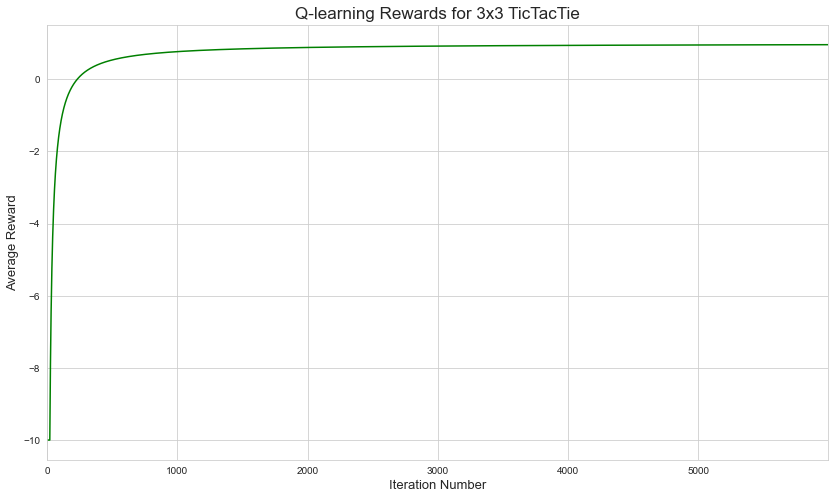

In [21]:
iterations=np.arange(0, len(q_learning_model.mean_rewards))

fig, ax = plt.subplots(1, 1, figsize=(14, 8))
ax.grid(True)
ax.plot(iterations, q_learning_model.mean_rewards, color="g")
ax.set_xlim((iterations[0], iterations[-1]))
# ax.set_ylim((-0.2, -0.02))
ax.set_xlabel('Iteration Number', fontsize=13)
ax.set_ylabel('Average Reward', fontsize=13)
_ = ax.set_title('Q-learning Rewards for 3x3 TicTacTie', fontsize=17)

In [4]:
env = TicTacToe(n_rows=4, n_cols=4, n_win=4)
q_learning_model = QLearning(env=env, n_iter=5000000, info_freq=150000, mean_update_freq=10000)

In [5]:
q_learning_model.train()

Average reward at iteration 0: -10.0
Average reward at iteration 150000: -10.0
Average reward at iteration 300000: -10.0
Average reward at iteration 450000: -10.0
Average reward at iteration 600000: -10.0
Average reward at iteration 750000: -10.0
Average reward at iteration 900000: -10.0
Average reward at iteration 1050000: -10.0
Average reward at iteration 1200000: -10.0
Average reward at iteration 1350000: -10.0
Average reward at iteration 1500000: -10.0
Average reward at iteration 1650000: -10.0
Average reward at iteration 1800000: -10.0
Average reward at iteration 1950000: -10.0
Average reward at iteration 2100000: -10.0
Average reward at iteration 2250000: -10.0
Average reward at iteration 2400000: -10.0
Average reward at iteration 2550000: -10.0
Average reward at iteration 2700000: -10.0
Average reward at iteration 2850000: -10.0
Average reward at iteration 3000000: -10.0
Average reward at iteration 3150000: -10.0
Average reward at iteration 3300000: -10.0
Average reward at itera

Training Q-learning for 3x3 board went much easier. Surprisingly, changing the board to 4x4 case makes everything much harder for Q-learning. Even small dimension change expands action space by a lot. Even after 5 million iterations it didn't converge. It ran for more than an hour and I didn't have time and patience to run it again.

## Part 2. Tic-Tac-Toe with DQN.

### Part 2.1. DQN.

I just used states as inputs by changing their hash code into array and feeding it into DQN. DQN didn't reach winning strategy after 600000 training steps for 4x4 board. It probably requries better hyperparameter tuning.

In [3]:
env = TicTacToe(n_rows=4, n_cols=4, n_win=4)

In [4]:
GAMMA = 0.99
STEPS_PER_UPDATE = 4
STEPS_PER_TARGET_UPDATE = STEPS_PER_UPDATE * 1000
LEARNING_RATE = 5e-4
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
BUFFER_SIZE = int(1e5)  # replay buffer size
BATCH_SIZE = 64


class ReplayBuffer:

        def __init__(self, action_size, buffer_size, batch_size, seed):
            self.action_size = action_size
            self.memory = deque(maxlen=buffer_size)  
            self.batch_size = batch_size
            self.experience = namedtuple("Experience", field_names=["state", "action", "reward", "next_state", "done"])
            self.seed = random.seed(seed)


        def add(self, e):
            self.memory.append(self.experience(e[0], e[1], e[2], e[3], e[4]))
            # dqn.consume_transition((state, action_idx, reward, next_state, done))
        

        def sample(self):
            experiences = random.sample(self.memory, k=self.batch_size)
            states = torch.from_numpy(np.vstack([e.state for e in experiences if e is not None])).float().to(device)
            actions = torch.from_numpy(np.vstack([e.action for e in experiences if e is not None])).long().to(device)
            rewards = torch.from_numpy(np.vstack([e.reward for e in experiences if e is not None])).float().to(device)
            next_states = torch.from_numpy(np.vstack([e.next_state for e in experiences if e is not None])).float().to(device)
            dones = torch.from_numpy(np.vstack([e.done for e in experiences if e is not None]).astype(np.uint8)).float().to(device)
    
            return (states, actions, rewards, next_states, dones)


        def __len__(self):
            return len(self.memory)


class QNetwork(nn.Module):

    def __init__(self, state_size, action_size):
        super(QNetwork, self).__init__()
        self.fc1 = nn.Linear(state_size, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, action_size)
        
    def forward(self, state):
        x = self.fc1(state)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        return self.fc3(x)

In [13]:
class DQN():

    def __init__(self, state_dim, action_dim, seed):
        self.steps = 0 # Do not change
        self.memory = ReplayBuffer(action_dim, BUFFER_SIZE, BATCH_SIZE, seed) # experience replay buffer
        self.state_size = state_dim
        self.action_size = action_dim
        self.seed = random.seed(seed)
        self.eps = 0.1

        # Model for training
        self.model = QNetwork(state_dim, action_dim).to(device)
        self.optimizer = Adam(self.model.parameters(), lr=LEARNING_RATE)


    def consume_transition(self, transition):
        # Add transition to a replay buffer
        self.memory.add(transition)


    def sample_batch(self):
        # Sample batch from a replay buffer
        return self.memory.sample()
        

    def train_step(self, batch):
        # Use batch to update DQN's network.
        states, actions, next_states, rewards, dones = batch
        ## Compute and minimize the loss
        ### Extract next maximum estimated value from target network
        q_targets_next = self.model(next_states).detach().max(1)[0].unsqueeze(1)
        ### Calculate target value from bellman equation
        q_targets = rewards + GAMMA * q_targets_next * (1 - dones)
        ### Calculate expected value from local network
        q_curr = self.model(states).gather(1, actions)
        ### Loss calculation (we used Mean squared error)
        loss = F.mse_loss(q_curr, q_targets)
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()


    def act(self, state):
        # Compute an action. Do not forget to turn state to a Tensor and then turn an action to a numpy array.
        state = torch.from_numpy(state).float().unsqueeze(0).to(device)
        self.model.eval()
        with torch.no_grad():
            action_values = self.model(state)
        self.model.train()

        # Epsilon-greedy action selection
        if random.random() > self.eps:
            return np.argmax(action_values.cpu().data.numpy())
        else:
            return random.choice(np.arange(self.action_size))


    def update(self, transition):
        # You don't need to change this
        self.consume_transition(transition)
        if self.steps % STEPS_PER_UPDATE == 0:
            batch = self.sample_batch()
            self.train_step(batch)
        self.steps += 1

In [14]:
action_to_idx, idx_to_action = get_action_dicts(env)

def state_to_array(state_string):
    state_list = []
    for c in state_string:
        state_list.append(int(c))
    return np.array(state_list)


def evaluate_policy(agent, env, episodes=5):
    returns = []
    for _ in range(episodes):
        done = False
        env.reset()
        state = state_to_array(env.getHash())
        total_reward = 0.1
        
        while not done:
            state, reward, done, _ = env.step(idx_to_action[agent.act(state)])
            state = state_to_array(state[0])
            total_reward += reward
        returns.append(total_reward)
    return returns
    

def sample_action(env):
    actions = env.getEmptySpaces()
    empty_spots_count = len(actions)
    picked_action = actions[np.random.randint(0, empty_spots_count)]
    hashed_action = action_to_hash(picked_action)
    action_idx = action_to_idx[hashed_action]

    return picked_action, action_idx

In [15]:
INITIAL_STEPS = 1024
TRANSITIONS = 600000

def train_dqn(dqn, rows=4, cols=4):
    env = TicTacToe(n_rows=rows, n_cols=cols, n_win=cols)
    eps = 0.01
    env.reset()
    state = state_to_array(env.getHash())
    total_rewards = []


    for _ in range(INITIAL_STEPS):
        # action = env.action_space.sample()
        picked_action, action_idx = sample_action(env)

        # next_state, reward, done, _ = env.step(action)
        next_state, reward, done, _ = env.step(picked_action)
        
        next_state = state_to_array(next_state[0])
        
        dqn.consume_transition((state, action_idx, next_state, reward, done))
            
        if not done:
            state = next_state 
        else:
            env.reset()
            state = state_to_array(env.getHash())
        

    for i in range(TRANSITIONS):
        #Epsilon-greedy policy
        if random.random() < eps:
            action, action_idx = sample_action(env)
        else:
            action_idx = dqn.act(state)
            action = idx_to_action[action_idx]

        next_state, reward, done, _ = env.step(action)
        next_state = state_to_array(next_state[0])
        dqn.update((state, action_idx, next_state, reward, done))
        
        if not done:
            state = next_state 
        else:
            env.reset()
            state = state_to_array(env.getHash())
        
        if (i + 1) % (TRANSITIONS//50) == 0:
            rewards = evaluate_policy(dqn, env, 30)
            total_rewards.append(np.mean(rewards))
            print(f"Step: {i+1}, Reward mean: {np.mean(rewards)}, Reward std: {np.std(rewards)}")

    return total_rewards

In [16]:
cols = 4
rows = 4
dqn = DQN(state_dim=rows*cols, action_dim=rows*cols, seed=12)
dqn_rewards = train_dqn(dqn)

Step: 12000, Reward mean: -9.899999999999999, Reward std: 1.7763568394002505e-15
Step: 24000, Reward mean: -9.899999999999999, Reward std: 1.7763568394002505e-15
Step: 36000, Reward mean: -9.899999999999999, Reward std: 1.7763568394002505e-15
Step: 48000, Reward mean: -9.899999999999999, Reward std: 1.7763568394002505e-15
Step: 60000, Reward mean: -9.899999999999999, Reward std: 1.7763568394002505e-15
Step: 72000, Reward mean: -9.899999999999999, Reward std: 1.7763568394002505e-15
Step: 84000, Reward mean: -9.899999999999999, Reward std: 1.7763568394002505e-15
Step: 96000, Reward mean: -9.899999999999999, Reward std: 1.7763568394002505e-15
Step: 108000, Reward mean: -9.899999999999999, Reward std: 1.7763568394002505e-15
Step: 120000, Reward mean: -9.899999999999999, Reward std: 1.7763568394002505e-15
Step: 132000, Reward mean: -3.300000000000002, Reward std: 5.388877434122992
Step: 144000, Reward mean: -9.166666666666664, Reward std: 2.7438820836342237
Step: 156000, Reward mean: -3.000

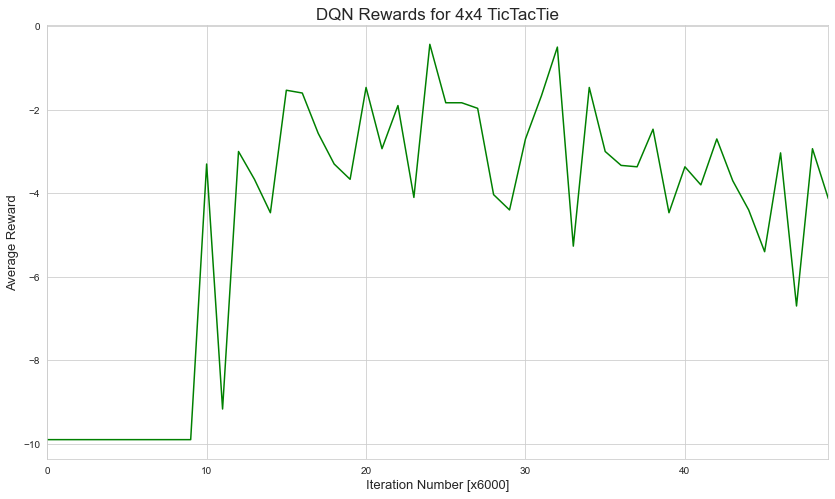

In [17]:
iterations=np.arange(0, len(dqn_rewards))

fig, ax = plt.subplots(1, 1, figsize=(14, 8))
ax.grid(True)
ax.plot(iterations, dqn_rewards, color="g")
ax.set_xlim((iterations[0], iterations[-1]))
ax.set_xlabel('Iteration Number [x6000]', fontsize=13)
ax.set_ylabel('Average Reward', fontsize=13)
_ = ax.set_title('DQN Rewards for 4x4 TicTacTie', fontsize=17)

### Part 2.2. Double DQN.

Implementation of double DQN reached much better results. It managed to achieve winning strategy for 4x4 board. Thus, fixing the q function estimation helps.

In [10]:
GAMMA = 0.99
STEPS_PER_UPDATE = 4
STEPS_PER_TARGET_UPDATE = STEPS_PER_UPDATE * 1000
LEARNING_RATE = 5e-4
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
BUFFER_SIZE = int(1e5)  # replay buffer size
BATCH_SIZE = 64


class DoubleDQN():

    def __init__(self, state_dim, action_dim, seed):
        self.steps = 0 # Do not change
        self.memory = ReplayBuffer(action_dim, BUFFER_SIZE, BATCH_SIZE, seed) # experience replay buffer
        self.state_size = state_dim
        self.action_size = action_dim
        self.seed = random.seed(seed)
        self.eps = 0.01

        # Model for training
        self.model = QNetwork(state_dim, action_dim).to(device) # Torch model
        self.model_local = QNetwork(state_dim, action_dim).to(device)
        self.optimizer = Adam(self.model_local.parameters(), lr=LEARNING_RATE)


    def consume_transition(self, transition):
        # Add transition to a replay buffer
        self.memory.add(transition)


    def sample_batch(self):
        # Sample batch from a replay buffer
        return self.memory.sample()
        

    def train_step(self, batch):
        # Use batch to update DQN's network.
        states, actions, next_states, rewards, dones = batch
        ## Compute and minimize the loss
        ### Extract next maximum estimated value from target network
        q_targets_next = self.model(next_states).detach().max(1)[0].unsqueeze(1)
        ### Calculate target value from bellman equation
        q_targets = rewards + GAMMA * q_targets_next * (1 - dones)
        ### Calculate expected value from local network
        q_expected = self.model_local(states).gather(1, actions)
        
        ### Loss calculation (we used Mean squared error)
        loss = F.mse_loss(q_expected, q_targets)
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

        # ------------------- update target network ------------------- #
        self.update_target_network()
        

    def update_target_network(self, tau=1e-3):
        # Update weights of a target Q-network here. You may use copy.deepcopy to do this or 
        # assign a values of network parameters via PyTorch methods.
        for target_param, local_param in zip(self.model.parameters(), self.model_local.parameters()):
            target_param.data.copy_(tau*local_param.data + (1.0-tau)*target_param.data)
            # target_param.data.copy_(tau*local_param.data)


    def act(self, state):
        # Compute an action. Do not forget to turn state to a Tensor and then turn an action to a numpy array.
        state = torch.from_numpy(state).float().unsqueeze(0).to(device)
        self.model_local.eval()
        with torch.no_grad():
            action_values = self.model_local(state)
        self.model_local.train()

        # Epsilon-greedy action selection
        if random.random() > self.eps:
            return np.argmax(action_values.cpu().data.numpy())
        else:
            return random.choice(np.arange(self.action_size))


    def update(self, transition):
        # You don't need to change this
        self.consume_transition(transition)
        if self.steps % STEPS_PER_UPDATE == 0:
            batch = self.sample_batch()
            self.train_step(batch)
            self.update_target_network()
        self.steps += 1

In [11]:
cols = 4
rows = 4
double_dqn = DoubleDQN(state_dim=rows*cols, action_dim=rows*cols, seed=12)
doouble_dqn_rewards = train_dqn(double_dqn)

Step: 12000, Reward mean: -9.899999999999999, Reward std: 1.7763568394002505e-15
Step: 24000, Reward mean: -9.899999999999999, Reward std: 1.7763568394002505e-15
Step: 36000, Reward mean: -9.899999999999999, Reward std: 1.7763568394002505e-15
Step: 48000, Reward mean: -9.899999999999999, Reward std: 1.7763568394002505e-15
Step: 60000, Reward mean: -9.899999999999999, Reward std: 1.7763568394002505e-15
Step: 72000, Reward mean: -9.3, Reward std: 2.2449944320643653
Step: 84000, Reward mean: 1.1000000000000003, Reward std: 2.220446049250313e-16
Step: 96000, Reward mean: 1.1000000000000003, Reward std: 2.220446049250313e-16
Step: 108000, Reward mean: -0.36666666666666675, Reward std: 3.7392809766347086
Step: 120000, Reward mean: 1.1000000000000003, Reward std: 2.220446049250313e-16
Step: 132000, Reward mean: 1.1000000000000003, Reward std: 2.220446049250313e-16
Step: 144000, Reward mean: 0.7333333333333337, Reward std: 1.9745604292826517
Step: 156000, Reward mean: 1.1000000000000003, Rewar

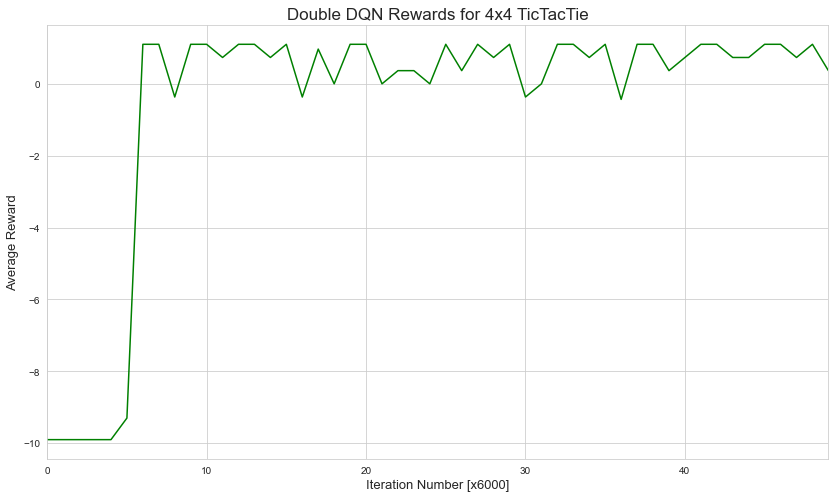

In [12]:
iterations=np.arange(0, len(doouble_dqn_rewards))

fig, ax = plt.subplots(1, 1, figsize=(14, 8))
ax.grid(True)
ax.plot(iterations, doouble_dqn_rewards, color="g")
ax.set_xlim((iterations[0], iterations[-1]))
ax.set_xlabel('Iteration Number [x6000]', fontsize=13)
ax.set_ylabel('Average Reward', fontsize=13)
_ = ax.set_title('Double DQN Rewards for 4x4 TicTacTie', fontsize=17)

## Part 3. Rollouts and MCTS.

Due to shortage of time I used made use of online implementation of Tic-Tac-Toe, while adjusting few things for our task. Results of rollouts and MCTS are given in the end.

In [188]:
from abc import ABC, abstractmethod
from collections import defaultdict
import math


class MCTS:
    "Monte Carlo tree searcher. First rollout the tree then choose a move."

    def __init__(self, exploration_weight=1):
        self.Q = defaultdict(int)  # total reward of each node
        self.N = defaultdict(int)  # total visit count for each node
        self.children = dict()  # children of each node
        self.exploration_weight = exploration_weight

    def choose(self, node):
        "Choose the best successor of node. (Choose a move in the game)"
        if node.is_terminal():
            raise RuntimeError(f"choose called on terminal node {node}")

        if node not in self.children:
            return node.find_random_child()

        def score(n):
            if self.N[n] == 0:
                return float("-inf")  # avoid unseen moves
            return self.Q[n] / self.N[n]  # average reward

        return max(self.children[node], key=score)


    def do_rollout(self, node):
        "Make the tree one layer better. (Train for one iteration.)"
        path = self._select(node)
        leaf = path[-1]
        self._expand(leaf)
        reward = self._simulate(leaf)
        self._backpropagate(path, reward)


    def do_rollout_with_reward(self, node):
        path = self._select(node)
        leaf = path[-1]
        self._expand(leaf)
        reward = self._simulate(leaf)
        return reward

    def _select(self, node):
        "Find an unexplored descendent of `node`"
        path = []
        while True:
            path.append(node)
            if node not in self.children or not self.children[node]:
                # node is either unexplored or terminal
                return path
            unexplored = self.children[node] - self.children.keys()
            if unexplored:
                n = unexplored.pop()
                path.append(n)
                return path
            node = self._uct_select(node)  # descend a layer deeper

    def _expand(self, node):
        "Update the `children` dict with the children of `node`"
        if node in self.children:
            return  # already expanded
        self.children[node] = node.find_children()

    def _simulate(self, node):
        "Returns the reward for a random simulation (to completion) of `node`"
        invert_reward = False
        while True:
            if node.is_terminal():
                reward = node.reward()
                return 1 - reward if invert_reward else reward
            node = node.find_random_child()
            invert_reward = not invert_reward

    def _backpropagate(self, path, reward):
        "Send the reward back up to the ancestors of the leaf"
        for node in reversed(path):
            self.N[node] += 1
            self.Q[node] += reward
            reward = 1 - reward  # 1 for me is 0 for my enemy, and vice versa

    def _uct_select(self, node):
        "Select a child of node, balancing exploration & exploitation"

        # All children of node should already be expanded:
        assert all(n in self.children for n in self.children[node])

        log_N_vertex = math.log(self.N[node])

        def uct(n):
            "Upper confidence bound for trees"
            return self.Q[n] / self.N[n] + self.exploration_weight * math.sqrt(
                log_N_vertex / self.N[n]
            )

        return max(self.children[node], key=uct)


class Node(ABC):
    """
    A representation of a single board state.
    MCTS works by constructing a tree of these Nodes.
    Could be e.g. a chess or checkers board state.
    """

    @abstractmethod
    def find_children(self):
        "All possible successors of this board state"
        return set()

    @abstractmethod
    def find_random_child(self):
        "Random successor of this board state (for more efficient simulation)"
        return None

    @abstractmethod
    def is_terminal(self):
        "Returns True if the node has no children"
        return True

    @abstractmethod
    def reward(self):
        "Assumes `self` is terminal node. 1=win, 0=loss, .5=tie, etc"
        return 0

    @abstractmethod
    def __hash__(self):
        "Nodes must be hashable"
        return 123456789

    @abstractmethod
    def __eq__(node1, node2):
        "Nodes must be comparable"
        return True

Implementation of an abstract class

In [189]:
from collections import namedtuple
from random import choice

_TTTB = namedtuple("TicTacToeBoard", "tup turn winner terminal")

# Inheriting from a namedtuple is convenient because it makes the class
# immutable and predefines __init__, __repr__, __hash__, __eq__, and others
class TicTacToeBoard(_TTTB, Node):

    def find_children(board):
        if board.terminal:  # If the game is finished then no moves can be made
            return set()
        # Otherwise, you can make a move in each of the empty spots
        return {
            board.make_move(i) for i, value in enumerate(board.tup) if value is None
        }


    def find_random_child(board):
        if board.terminal:
            return None  # If the game is finished then no moves can be made
        empty_spots = [i for i, value in enumerate(board.tup) if value is None]
        return board.make_move(choice(empty_spots))

    def reward(board):
        if board.winner == True:
            return -10 # MCTS lost
        elif board.winner == None:
            return 0.5
        else:
            return 1  # MCTS won

    def is_terminal(board):
        return board.terminal

    def make_move(board, index):
        tup = board.tup[:index] + (board.turn,) + board.tup[index + 1 :]
        turn = not board.turn
        winner = _find_winner(tup)
        is_terminal = (winner is not None) or not any(v is None for v in tup)
        return TicTacToeBoard(tup, turn, winner, is_terminal)


def play_game(rollouts=50):
    tree = MCTS()
    board = new_tic_tac_toe_board()
    while True:
        empty_spots = [i for i, value in enumerate(board.tup) if value is None]
        index = choice(empty_spots)
        board = board.make_move(index)
        if board.terminal:
            break
        # You can train as you go, or only at the beginning.
        # Here, we train as we go, doing fifty rollouts each turn.
        for _ in range(rollouts):
            tree.do_rollout(board)
        board = tree.choose(board)
        if board.terminal:
            break
    return board.reward()


def get_rollout_rewards(rollouts=50):
    tree = MCTS()
    board = new_tic_tac_toe_board()
    rollout_results = []
    for _ in range(rollouts):
        rollout_results.append(tree.do_rollout_with_reward(board))
    return rollout_results


def simulate(episodes=50, rollouts=50):
    rewards = []
    for _ in range(episodes):
        rewards.append(play_game(rollouts))
    
    return np.mean(np.array(rewards))


def _winning_combos():
    for start in range(0, 16, 4):  # three in a row
        yield (start, start + 1, start + 2, start + 3)
    for start in range(4):  # three in a column
        yield (start, start + 4, start + 8, start + 12)
    yield (0, 5, 10, 15)  # down-right diagonal
    yield (3, 6, 9, 12)  # down-left diagonal


def _find_winner(tup):
    "Returns None if no winner, True if X wins, False if O wins"
    for i1, i2, i3, i4 in _winning_combos():
        v1, v2, v3, v4 = tup[i1], tup[i2], tup[i3], tup[i4]
        if False is v1 is v2 is v3 is v4:
            return False
        if True is v1 is v2 is v3 is v4:
            return True
    return None


def new_tic_tac_toe_board():
    return TicTacToeBoard(tup=(None,) * 16, turn=True, winner=None, terminal=False)   

In [210]:
rollout_results = []

for _ in range(100):
    rollout_results.append(np.mean(np.array(get_rollout_rewards(rollouts=15))))

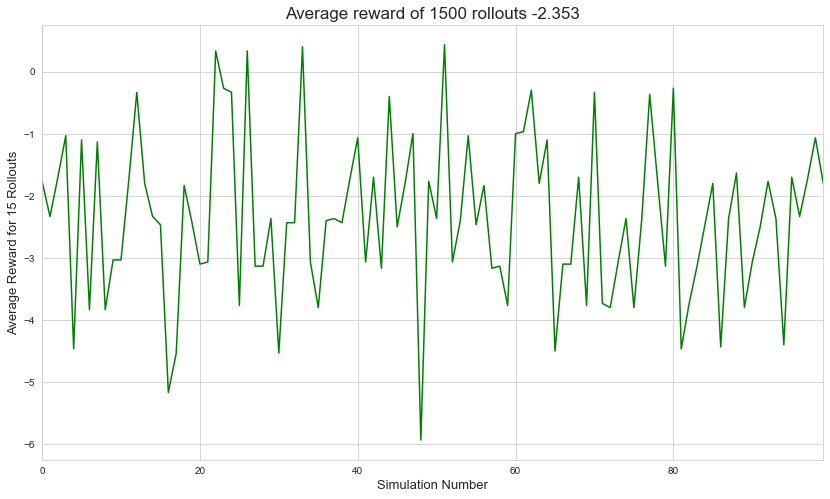

In [213]:
iterations=np.arange(0, len(rollout_results))

fig, ax = plt.subplots(1, 1, figsize=(14, 8))
ax.grid(True)
ax.plot(iterations, rollout_results, color="g")
ax.set_xlim((iterations[0], iterations[-1]))
ax.set_xlabel('Simulation Number', fontsize=13)
ax.set_ylabel('Average Reward for 15 Rollouts', fontsize=13)
_ = ax.set_title(f'Average reward of 1500 rollouts {np.mean(np.array(rollout_results))}', fontsize=17)

In [154]:
rollout_rewards = []

for i in range(70):
    rollout_rewards.append(simulate(episodes=50, rollouts=i))

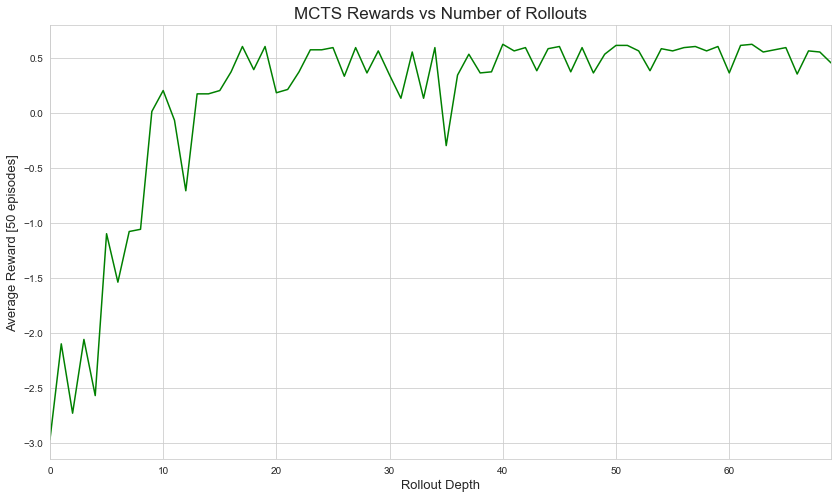

In [157]:
iterations=np.arange(0, len(rollout_rewards))

fig, ax = plt.subplots(1, 1, figsize=(14, 8))
ax.grid(True)
ax.plot(iterations, rollout_rewards, color="g")
ax.set_xlim((iterations[0], iterations[-1]))
ax.set_xlabel('Rollout Depth', fontsize=13)
ax.set_ylabel('Average Reward [50 episodes]', fontsize=13)
_ = ax.set_title('MCTS Rewards vs Number of Rollouts', fontsize=17)

## Analysis and Conclusion.

- Q-learning works really bad when deep multi-move simulations need to be carried out
- DQN needs careful parameter and hyperparameter choices to ensure its effectiveness. It's relatively easy in implementation if person can deal well with neural networks
- Rollouts can sometimes provide a winning strategy which is expected, but they are not good as an algorithm on their own
- MCTS performs the best. Its training/inference time is very fast in case of 4x4 board compared to DQN where I had to wait for training. I guess once we go to higher dimensions and when it will require more rollouts then the inference time issues will arise due to simulation of rollouts. 